In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import astropy.cosmology as apc

%matplotlib inline

In [2]:
BGS_data = Table.read('/global/project/projectdirs/desi/users/shadaba/Buzzard/FiberAssign/FA_LSS/buzzard_FullFAnew_BGS.fits')

In [3]:
BGS_data[:5]

RA,DEC,Z_COSMO,DZ_RSD,id,Z,PASS,epoch,year,TARGETID
float64,float64,float32,float32,int64,float32,int64,int64,int64,int64
44.3956487453,4.99122348769,0.339316,0.000291198,0,-1.0,-1,-1,-1,-1
45.897144708,1.87513013936,0.336526,-0.00118455,1,0.335342,5,0,1,288230376151711744
42.6558712955,5.38564605601,0.340032,-0.000127256,2,0.339905,7,4,3,288230376151711744
45.0491382746,4.04734531688,0.333508,0.000130296,3,-1.0,-1,-1,-1,-1
46.3167583294,6.03060448002,0.330785,-7.53403e-05,4,-1.0,-1,-1,-1,-1


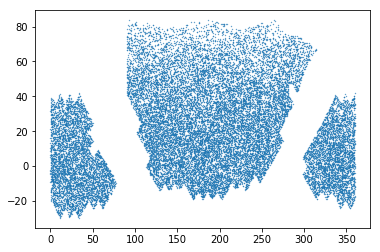

In [4]:
n = len(BGS_data)
r = np.random.random(n)
ii = r<0.001
plt.scatter(BGS_data['RA'][ii], BGS_data['DEC'][ii], s=0.1)

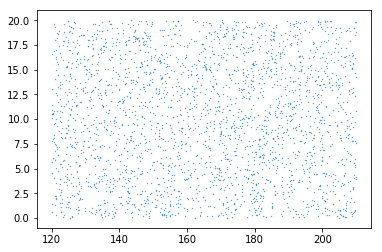

In [11]:
kk = (BGS_data['RA']>120) & (BGS_data['RA']<210) & (BGS_data['DEC']>0.0) & (BGS_data['DEC']<20.0)
zz = BGS_data['Z']>0.0
plt.scatter(BGS_data['RA'][kk & ii], BGS_data['DEC'][kk & ii], s=0.1)

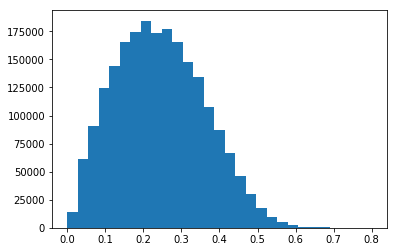

In [12]:
_ = plt.hist(BGS_data['Z_COSMO'][kk & zz], bins=np.linspace(0.0, 0.80, 30))

In [13]:
BGS_cut = BGS_data[kk]

In [14]:
len(BGS_cut)

2534811

In [15]:
planck15 = apc.Planck15
BGS_cut['R_COMOV'] = planck15.comoving_distance(BGS_cut['Z_COSMO']+BGS_cut['DZ_RSD'])

In [25]:
BGS_cut['theta'] = np.deg2rad(90-BGS_cut['DEC'])
BGS_cut['phi'] = np.deg2rad((360-BGS_cut['RA'] - (90+60))%360.0)
BGS_cut['z_coord'] = BGS_cut['R_COMOV'] * np.cos(BGS_cut['theta'])
BGS_cut['y_coord'] = BGS_cut['R_COMOV'] * np.sin(BGS_cut['theta']) * np.sin(BGS_cut['phi'])
BGS_cut['x_coord'] = BGS_cut['R_COMOV'] * np.sin(BGS_cut['theta']) * np.cos(BGS_cut['phi'])
BGS_cut['RAND'] = np.random.random(len(BGS_cut))

(-131.86886517969586,
 2941.6372291709504,
 -139.64368902668014,
 2933.8624053239664)

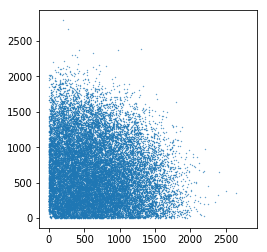

In [28]:
rr = BGS_cut['RAND']<0.01
plt.scatter(BGS_cut['x_coord'][rr], BGS_cut['y_coord'][rr], s=0.1)
plt.axis('square')

In [29]:
BGS_cut[:5]

RA,DEC,Z_COSMO,DZ_RSD,id,Z,PASS,epoch,year,TARGETID,R_COMOV,theta,phi,z_coord,y_coord,x_coord,RAND
,,,,,,,,,,Mpc,,,Mpc,Mpc,Mpc,
float64,float64,float32,float32,int64,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
136.348526798,7.49313947849,0.337103,-0.0011611,44678508,0.335942,7,6,4,288230376420147200,1366.33792042,1.44001637158,1.28546070631,178.1806809,1299.89700086,381.311873514,0.0475772980108
138.251671552,3.82630877191,0.335308,-0.00196138,44678517,0.333347,5,1,1,288230376420147200,1356.71821993,1.50401464053,1.25224456422,90.5365997279,1285.58964306,423.965472725,0.402396069005
131.367998489,3.73154308037,0.339591,-0.00163293,44678523,0.337958,5,1,1,288230376420147200,1373.79891409,1.50566861386,1.3723873238,89.4091434247,1343.9915334,270.215135702,0.983687681024
132.197077926,3.69431912291,0.341908,-0.00223082,44678532,0.339678,5,1,1,288230376420147200,1380.1586826,1.50631829448,1.35791715787,88.9282675919,1346.20069168,290.987027375,0.55174075928
135.350871039,1.21042416588,0.340685,-0.00129306,44678541,-1.0,-1,-1,-1,-1,1379.10112629,1.54967043975,1.30287308412,29.1325675058,1329.60183838,365.007070348,0.962883370186


In [42]:
set(BGS_cut['PASS'])
nn = BGS_cut['R_COMOV'] < 1000

In [43]:
np.savetxt('BGS_truth.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn])

In [44]:
aa = BGS_cut['PASS']>0
bb = BGS_cut['PASS']==5
cc = BGS_cut['PASS']==6
dd = BGS_cut['PASS']==7

In [45]:
np.savetxt('BGS_pass_1.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn & bb])

In [46]:
np.savetxt('BGS_pass_1_2.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn & (bb|cc)])

In [47]:
np.savetxt('BGS_pass_1_2_3.txt', BGS_cut[['x_coord', 'y_coord','z_coord']][nn & (bb|cc|dd)])

In [48]:
beta_data_pass_1 = np.loadtxt('xdl_beta_skeleton/beta_1.0_BGS_pass_1.BSKinfo')

In [62]:
beta_data_pass_123 = np.loadtxt('xdl_beta_skeleton/beta_1.0_BGS_pass_1_2_3.BSKinfo')

In [ ]:
beta_data_truth = np.loadtxt('xdl_beta_skeleton/beta_1.0_BGS_truth.BSKinfo')

NameError: name 'beta_data_truth' is not defined

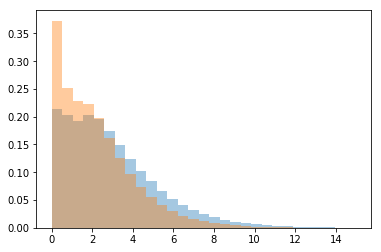

In [74]:
#distance, redshift, length, mu
_ = plt.hist(beta_data_pass_1[:,2], bins=np.linspace(0.0, 15.0, 30), density=True, alpha=0.4)
_ = plt.hist(beta_data_pass_123[:,2], bins=np.linspace(0.0, 15.0, 30), density=True, alpha=0.4)
_ = plt.hist(beta_data_truth[:,2], bins=np.linspace(0.0, 15.0, 30), density=True, alpha=0.4)

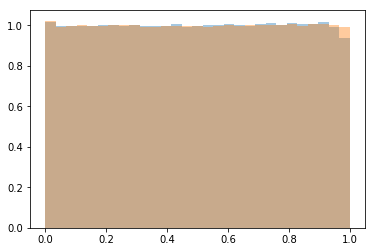

In [72]:
#distance, redshift, length, mu
_ = plt.hist(np.abs(beta_data_pass_1[:,3]), bins=np.linspace(0, 1.0, 30), density=True, alpha=0.4)
_ = plt.hist(np.abs(beta_data_pass_123[:,3]), bins=np.linspace(0, 1.0, 30), density=True, alpha=0.4)